In [2]:
!pip install tensorflow

import warnings
import numpy as np
import pandas as pd





  
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import metrics

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/377.0 MB 14.7 MB/s eta 0:00:26
   ---------------------------------------- 0.9/377.0 MB 11.7 MB/s eta 0:00:33
   ---------------------------------------- 1.4/377.0 MB 10.7 MB/s eta 0:00:36
   ---------------------------------------- 1.8/377.0 MB 10.4 MB/s eta 0:00:37
   ---------------------------------------- 2.2/377.0 MB 10.1 MB/s eta 0:00:37
   ---------------------------------------- 2.7/377.0 MB 10.0 MB/s eta 0:00:38
   ---------------------------------------- 3.1/377.0 MB 9.9 MB/s eta 0:00:38
   ---------------------------------------- 3.6/377.0 MB 9.9 MB/s eta 0:00:38
   ---------------------------------------- 4

In [3]:
path = r"Mastercard_stock_history.csv"

df = pd.read_csv(path, index_col = "Date", parse_dates = ["Date"])
print(df.shape)

(3872, 7)


In [4]:
df.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3872 entries, 2006-05-25 to 2021-10-11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3872 non-null   float64
 1   High          3872 non-null   float64
 2   Low           3872 non-null   float64
 3   Close         3872 non-null   float64
 4   Volume        3872 non-null   int64  
 5   Dividends     3872 non-null   float64
 6   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 242.0 KB


In [6]:
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0
2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0
2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0
2006-06-02,4.511782,4.530387,4.352707,4.371312,37253000,0.0,0.0
2006-06-05,4.376895,4.581554,4.372244,4.572251,37188000,0.0,0.0
2006-06-06,4.649463,4.709930,4.446665,4.493178,49045000,0.0,0.0
2006-06-07,4.495968,4.502480,4.348986,4.428059,25013000,0.0,0.0


In [7]:
df.tail(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-09-28,355.051403,355.550772,348.609530,350.736847,3266900,0.00,0.0
2021-09-29,352.364798,356.729279,351.965309,352.744324,2808800,0.00,0.0
2021-09-30,354.292361,355.550781,346.961627,347.241272,4393300,0.00,0.0
2021-10-01,349.388549,362.721709,346.721935,359.725494,5227300,0.00,0.0
2021-10-04,359.475786,360.194878,338.911773,343.765656,7901500,0.00,0.0
2021-10-05,347.121403,348.130138,342.497241,342.776886,4724100,0.00,0.0
2021-10-06,339.580960,348.439763,338.682072,348.250000,3712000,0.00,0.0
2021-10-07,349.000000,357.899994,349.000000,353.910004,3209200,0.44,0.0
2021-10-08,356.000000,360.369995,354.209991,354.959991,2336700,0.00,0.0


In [8]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


In [9]:
df.isna().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [10]:
df.duplicated().sum()

0

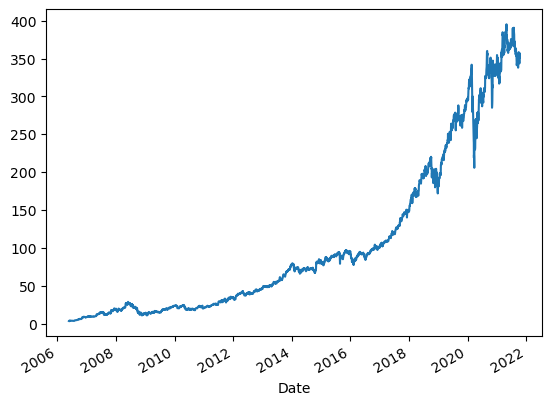

In [11]:
df["Mean"] = (df["High"] + df["Low"]) / 2
df.loc[:, "Mean"].plot()
plt.show()

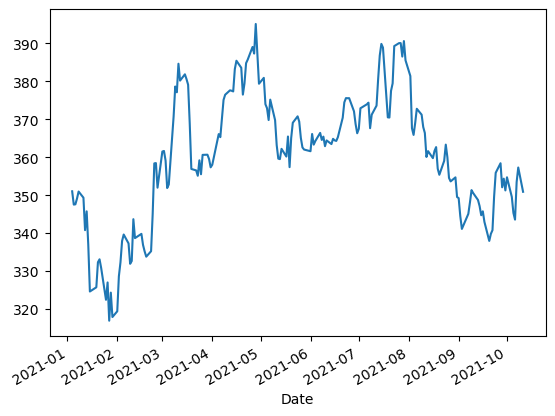

In [12]:
df.loc["2021", "Mean"].plot()
plt.show()

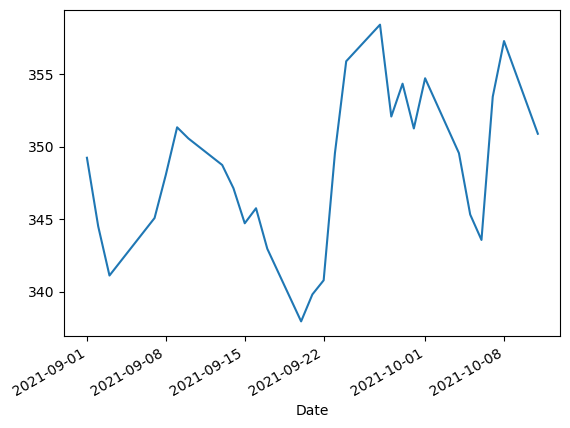

In [13]:
df.loc["2021-9":, "Mean"].plot()
plt.show()

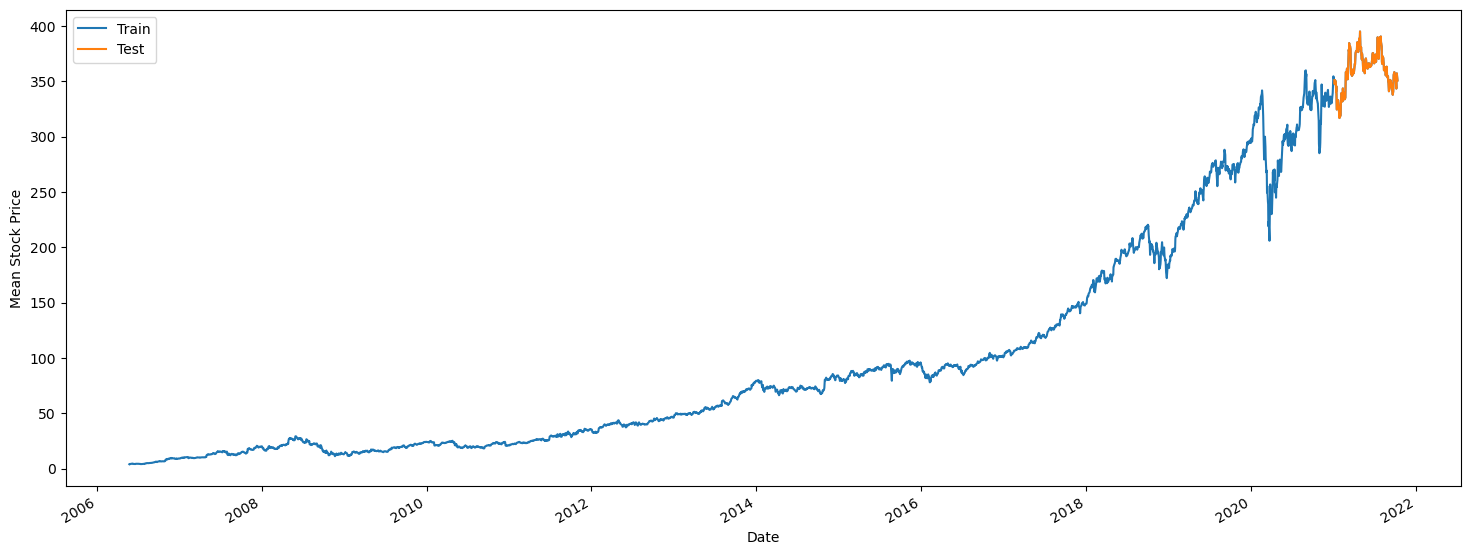

In [14]:
plt.figure(figsize = (18, 7))
df.loc[:"2021", "Mean"].plot(label = "Train", ylabel = "Mean Stock Price")
df.loc["2021":, "Mean"].plot(label = "Test", ylabel = "Mean Stock Price")
plt.legend()
plt.show()

In [15]:
# Splitting the data into train and test sets

train = df.loc[:"2021", "Mean"].values
test = df.loc["2021":, "Mean"].values

print(train.shape, test.shape)

(3872,) (195,)


In [16]:
# Feature Scaling (MinMax Normalization)

train = (train - train.min()) / (train.max() - train.min())
test = (test - test.min()) / (test.max() - test.min())

print(train.min(), train.max())
print(test.min(), test.max())

0.0 1.0
0.0 1.0


In [17]:
# Splitting the train and test sets into sequences (X_train, y_train, X_test, y_test)

## X_train, X_test : Mean stock price for n consecutive days
## y_train, y_test: Mean stock price on the (n+1)th day

X_train, y_train, X_test, y_test = [], [], [], []
seq_size = 3

for i in range(train.shape[0] - seq_size):
    X_train.append(train[i:i + seq_size])
    y_train.append(train[i + seq_size])
    
for i in range(test.shape[0] - seq_size):
    X_test.append(test[i:i + seq_size])
    y_test.append(test[i + seq_size])

X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3869, 3) (3869,) (192, 3) (192,)


In [18]:
print(X_train[:10], y_train[:10], sep = "\n\n")

[[0.         0.00054704 0.0001879 ]
 [0.00054704 0.0001879  0.00041147]
 [0.0001879  0.00041147 0.00080272]
 [0.00041147 0.00080272 0.00109884]
 [0.00080272 0.00109884 0.00118922]
 [0.00109884 0.00118922 0.00144847]
 [0.00118922 0.00144847 0.00105841]
 [0.00144847 0.00105841 0.00082889]
 [0.00105841 0.00082889 0.00121658]
 [0.00082889 0.00121658 0.00098706]]

[0.00041147 0.00080272 0.00109884 0.00118922 0.00144847 0.00105841
 0.00082889 0.00121658 0.00098706 0.0007611 ]


In [19]:
# Reshaping X_train and X_test (univariate series)

X_train = X_train.reshape(*X_train.shape, -1)
X_test = X_test.reshape(*X_test.shape, -1)

print(X_train.shape, X_test.shape)

(3869, 3, 1) (192, 3, 1)


In [20]:
# Building a sequential LSTM model 

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units = 128, activation = "relu", input_shape = (X_train.shape[1:])),
    tf.keras.layers.Dense(units = 1)
])

model.summary()

C:\Users\Erdem\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,689 (260.50 KB)

 Trainable params: 66,689 (260.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
!pip install pydot
model.compile(loss = "mean_squared_error", metrics = ["mse"], optimizer = "adam")
tf.keras.utils.plot_model(model, show_layer_activations = True, show_shapes = True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [23]:
c1 = tf.keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True)

history = model.fit(X_train, y_train, epochs = 30, callbacks = [c1])

Epoch 1/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0565 - mse: 0.0565
Epoch 2/30
 60/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7169e-05 - mse: 8.7169e-05

C:\Users\Erdem\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,mse
  current = self.get_monitor_value(logs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.5280e-05 - mse: 8.5280e-05
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.2499e-05 - mse: 9.2499e-05
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3544e-05 - mse: 8.3544e-05
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4333e-05 - mse: 7.4333e-05
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3517e-05 - mse: 7.3517e-05
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5014e-05 - mse: 7.5014e-05
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2051e-05 - mse: 8.2051e-05
Epoch 9/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.2372e-05 - mse: 8.2372e-05
Epoch 10/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3449e-05 - mse: 8.3449e-05
Epoch 11/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.1318e-05 - mse: 8.1318e-05
Epoch 12/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.4755e-05 - mse: 7.4755e-05
Epoch 13/30
121/121 ━━━━━━━━━

In [25]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0078 - mse: 0.0078  


[0.00700683007016778, 0.00700683007016778]

In [26]:
y_test_pred = model.predict(X_test)[:, 0]

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


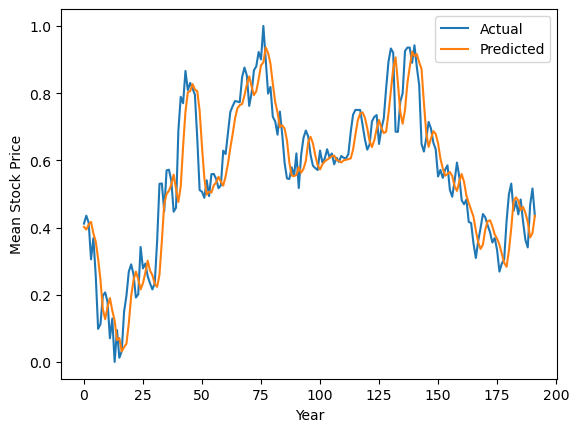

In [27]:
plt.plot(y_test, label = "Actual")
plt.plot(y_test_pred, label = "Predicted")
plt.xlabel("Year")
plt.ylabel("Mean Stock Price")
plt.legend()
plt.show()

In [28]:
print("R-Squared Value:", metrics.r2_score(y_test, y_test_pred))

R-Squared Value: 0.8505457818919137
